# Optical Character Recognition (OCR) - Azure Cognitive Services

## Step 0 Import Libraries

In [69]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO
import matplotlib
import matplotlib.font_manager as font_manager
from os import path

### Set the Azure Credentials

In [ ]:
# Set the Azure Credentials
#os.environ['COMPUTER_VISION_ENDPOINT'] = 'endpoint-info'
#os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY'] = 'suscription-key-info'

## Step 1 Fonts Path

https://ipafont.ipa.go.jp/old/ipafont/download.html

In [90]:
#Set the fonts path
font_path = path.expanduser(r'E:\Users\Usuario\Documents\OCR project\OCR_project\Fonts\IPAMTTC00303\ipam.ttc')


# Step 2 Call OCR API

In [39]:

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

ocr_url = endpoint + "vision/v3.0/ocr"

# Set image_url to the URL of an image that you want to analyze.
image_url = 'https://github.com/RohanAlexander/japanese_dictionaries/blob/master/inputs/00-sample-pages_1-cropped.png?raw=true'


headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos


[{'boundingBox': '735,30,34,34', 'text': 'あ'},
 {'boundingBox': '736,71,34,26', 'text': 'い'},
 {'boundingBox': '749,100,6,11', 'text': '・'},
 {'boundingBox': '735,116,34,27', 'text': 'い'},
 {'boundingBox': '736,149,33,33', 'text': 'ん'},
 {'boundingBox': '736,232,33,10', 'text': '〔'},
 {'boundingBox': '734,244,36,33', 'text': '合'},
 {'boundingBox': '738,281,29,33', 'text': '印'},
 {'boundingBox': '736,314,33,11', 'text': '〕'},
 {'boundingBox': '739,335,30,11', 'text': '('},
 {'boundingBox': '739,345,28,29', 'text': '名'},
 {'boundingBox': '739,375,30,10', 'text': ')'},
 {'boundingBox': '744,397,26,27', 'text': '帳'},
 {'boundingBox': '743,425,27,27', 'text': '簿'},
 {'boundingBox': '753,455,7,8', 'text': '・'},
 {'boundingBox': '744,467,26,26', 'text': '書'},
 {'boundingBox': '744,495,26,25', 'text': '類'},
 {'boundingBox': '745,524,24,20', 'text': 'の'},
 {'boundingBox': '748,551,21,21', 'text': 'ひ'},
 {'boundingBox': '748,575,20,27', 'text': 'き'},
 {'boundingBox': '747,604,22,25', 'text': 'あ'

In [40]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [41]:
image.size

(1588, 2776)

# Print characters over the canvas

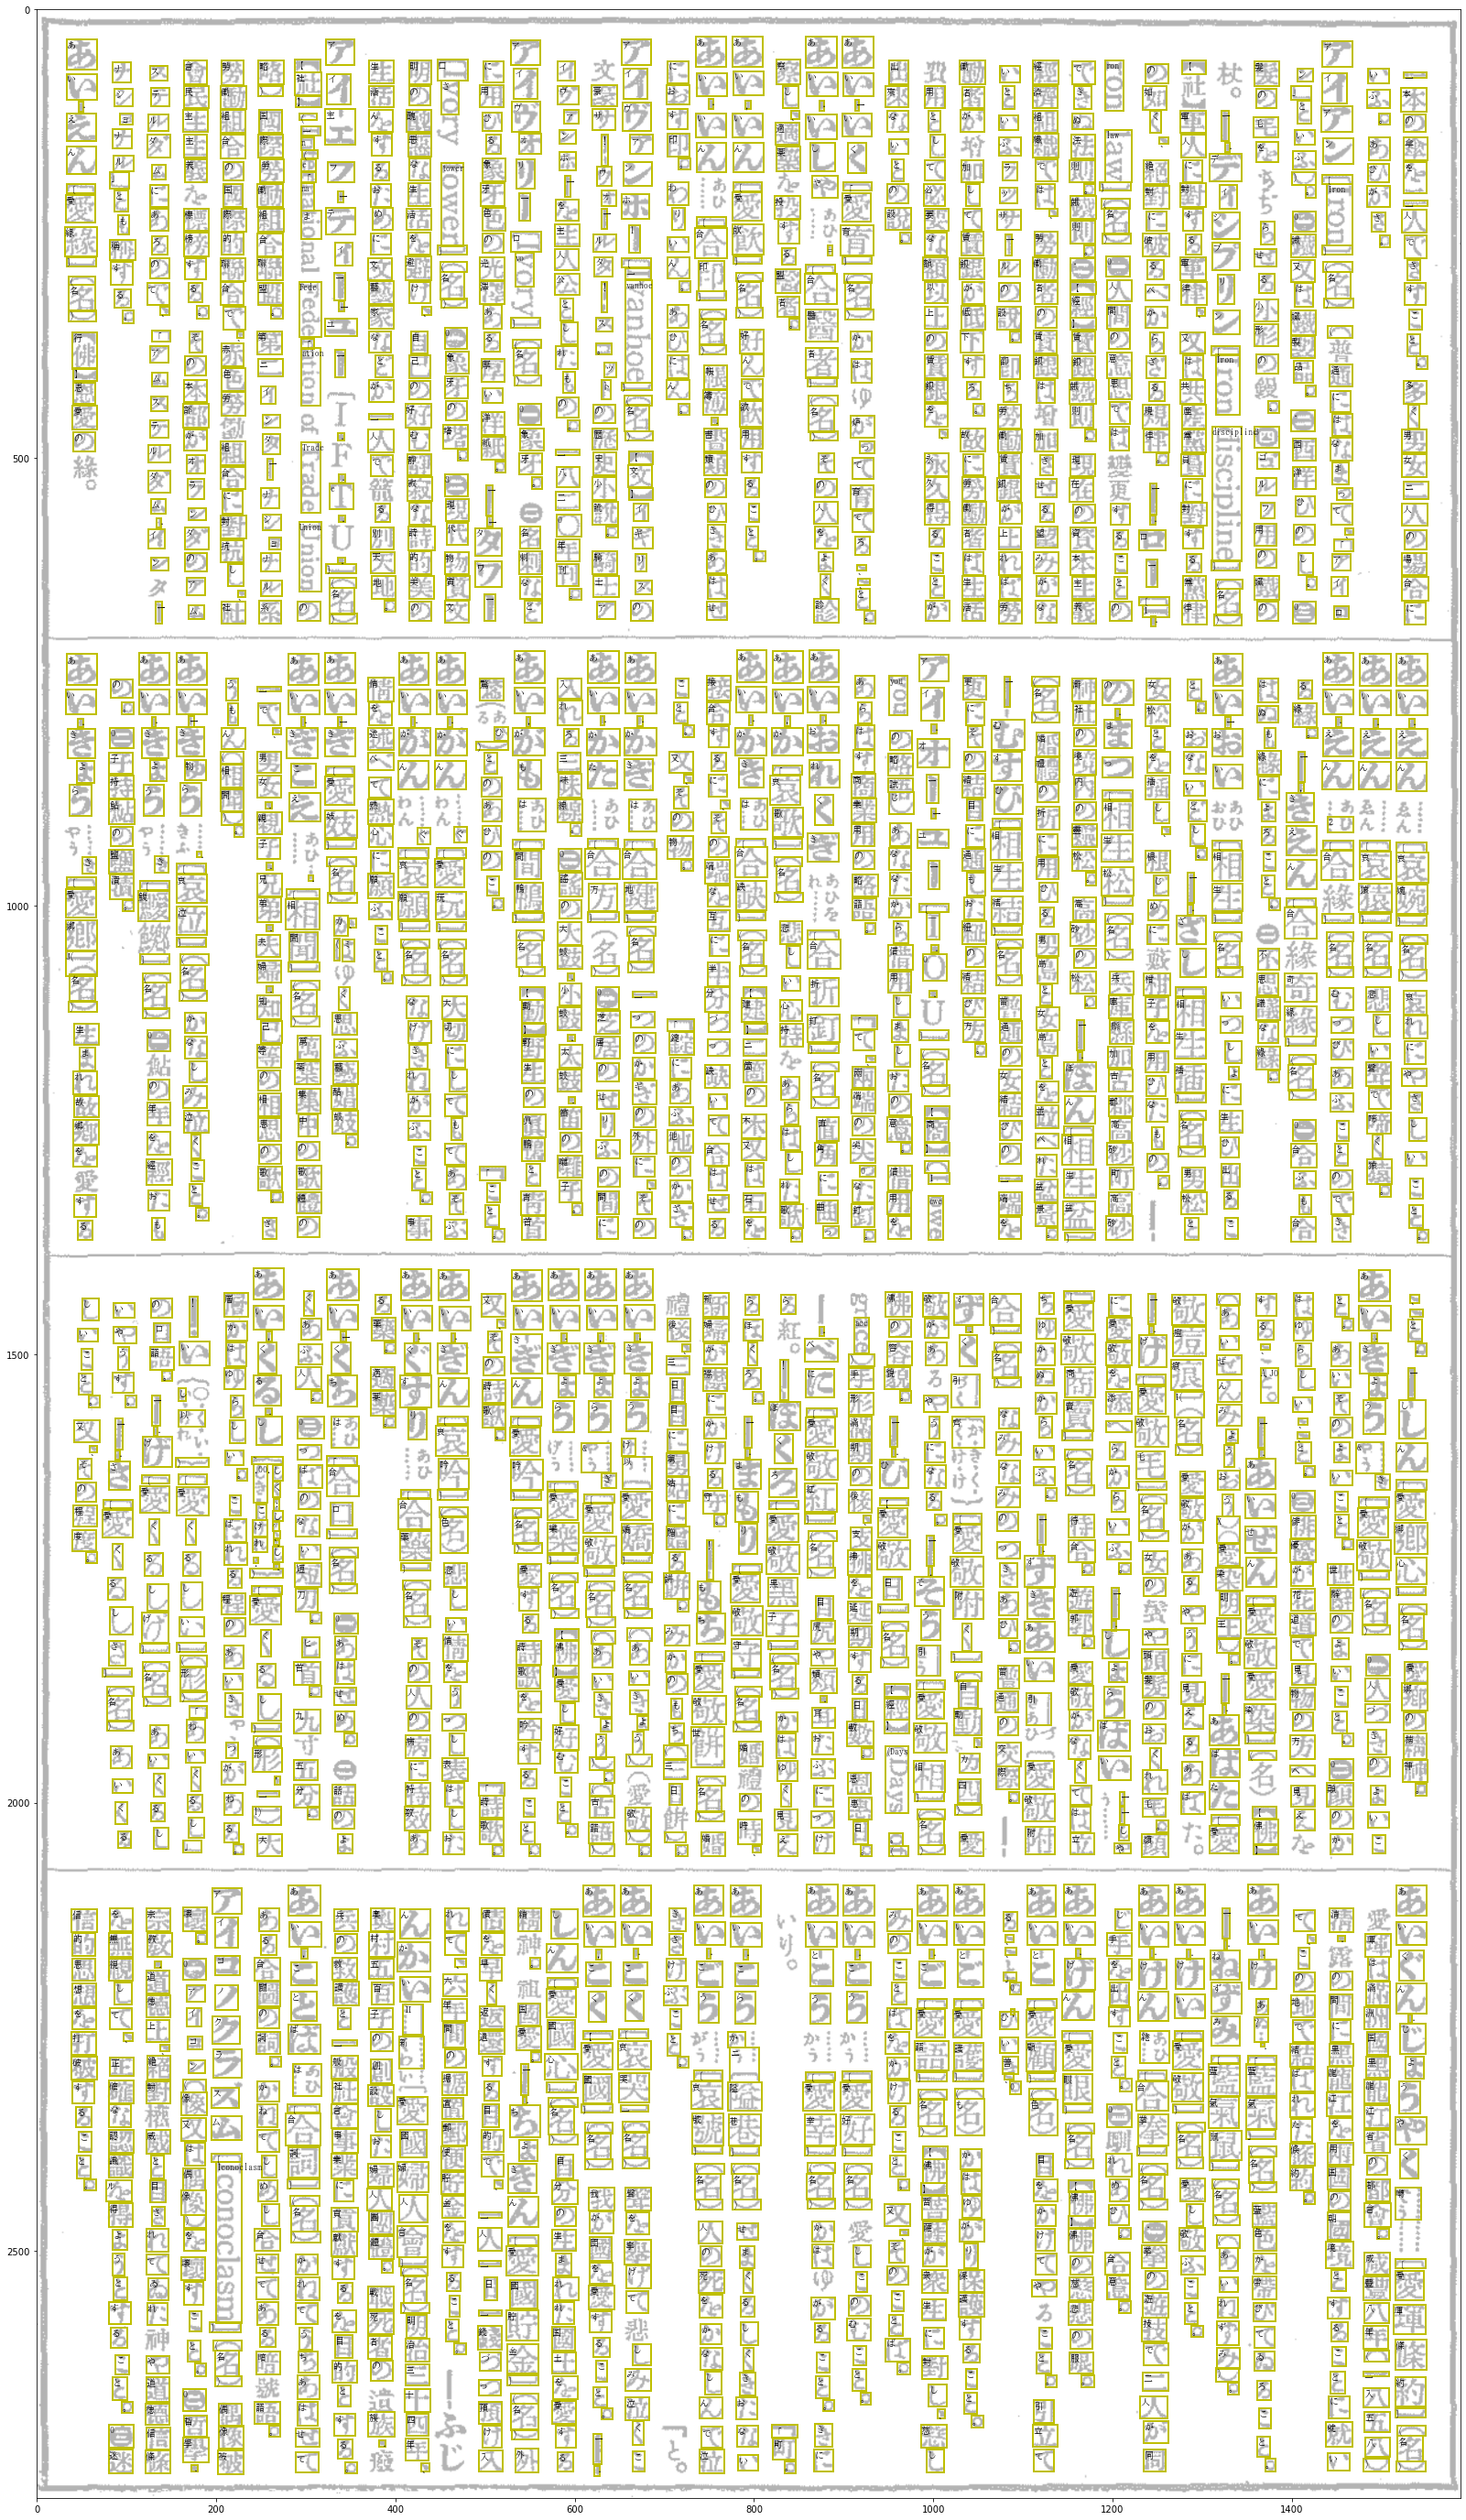

(0.0, 1.0, 0.0, 1.0)

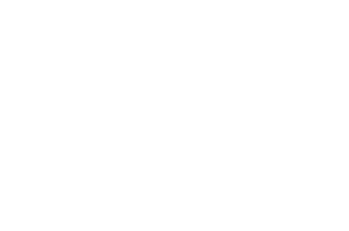

In [91]:
font = font_manager.FontProperties(fname=font_path)#'/Users/user/Downloads/IPAfont00303/ipag.ttf')
#plt.rcParams["font.family"]="sans-serif"

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(50,50))
ax = plt.imshow(image, alpha=0.3)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    #print(text)
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y', label = 'label')
    ax.axes.add_patch(patch)
    
    ax.axes.text(origin[0], origin[1], text, size = 20, weight="bold", va="top", fontproperties = font) 
plt.show()
plt.axis("off")

# Print Image 

In [19]:
image_url

'https://github.com/RohanAlexander/japanese_dictionaries/blob/master/inputs/00-sample-pages_1-cropped.png?raw=true'

In [20]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))


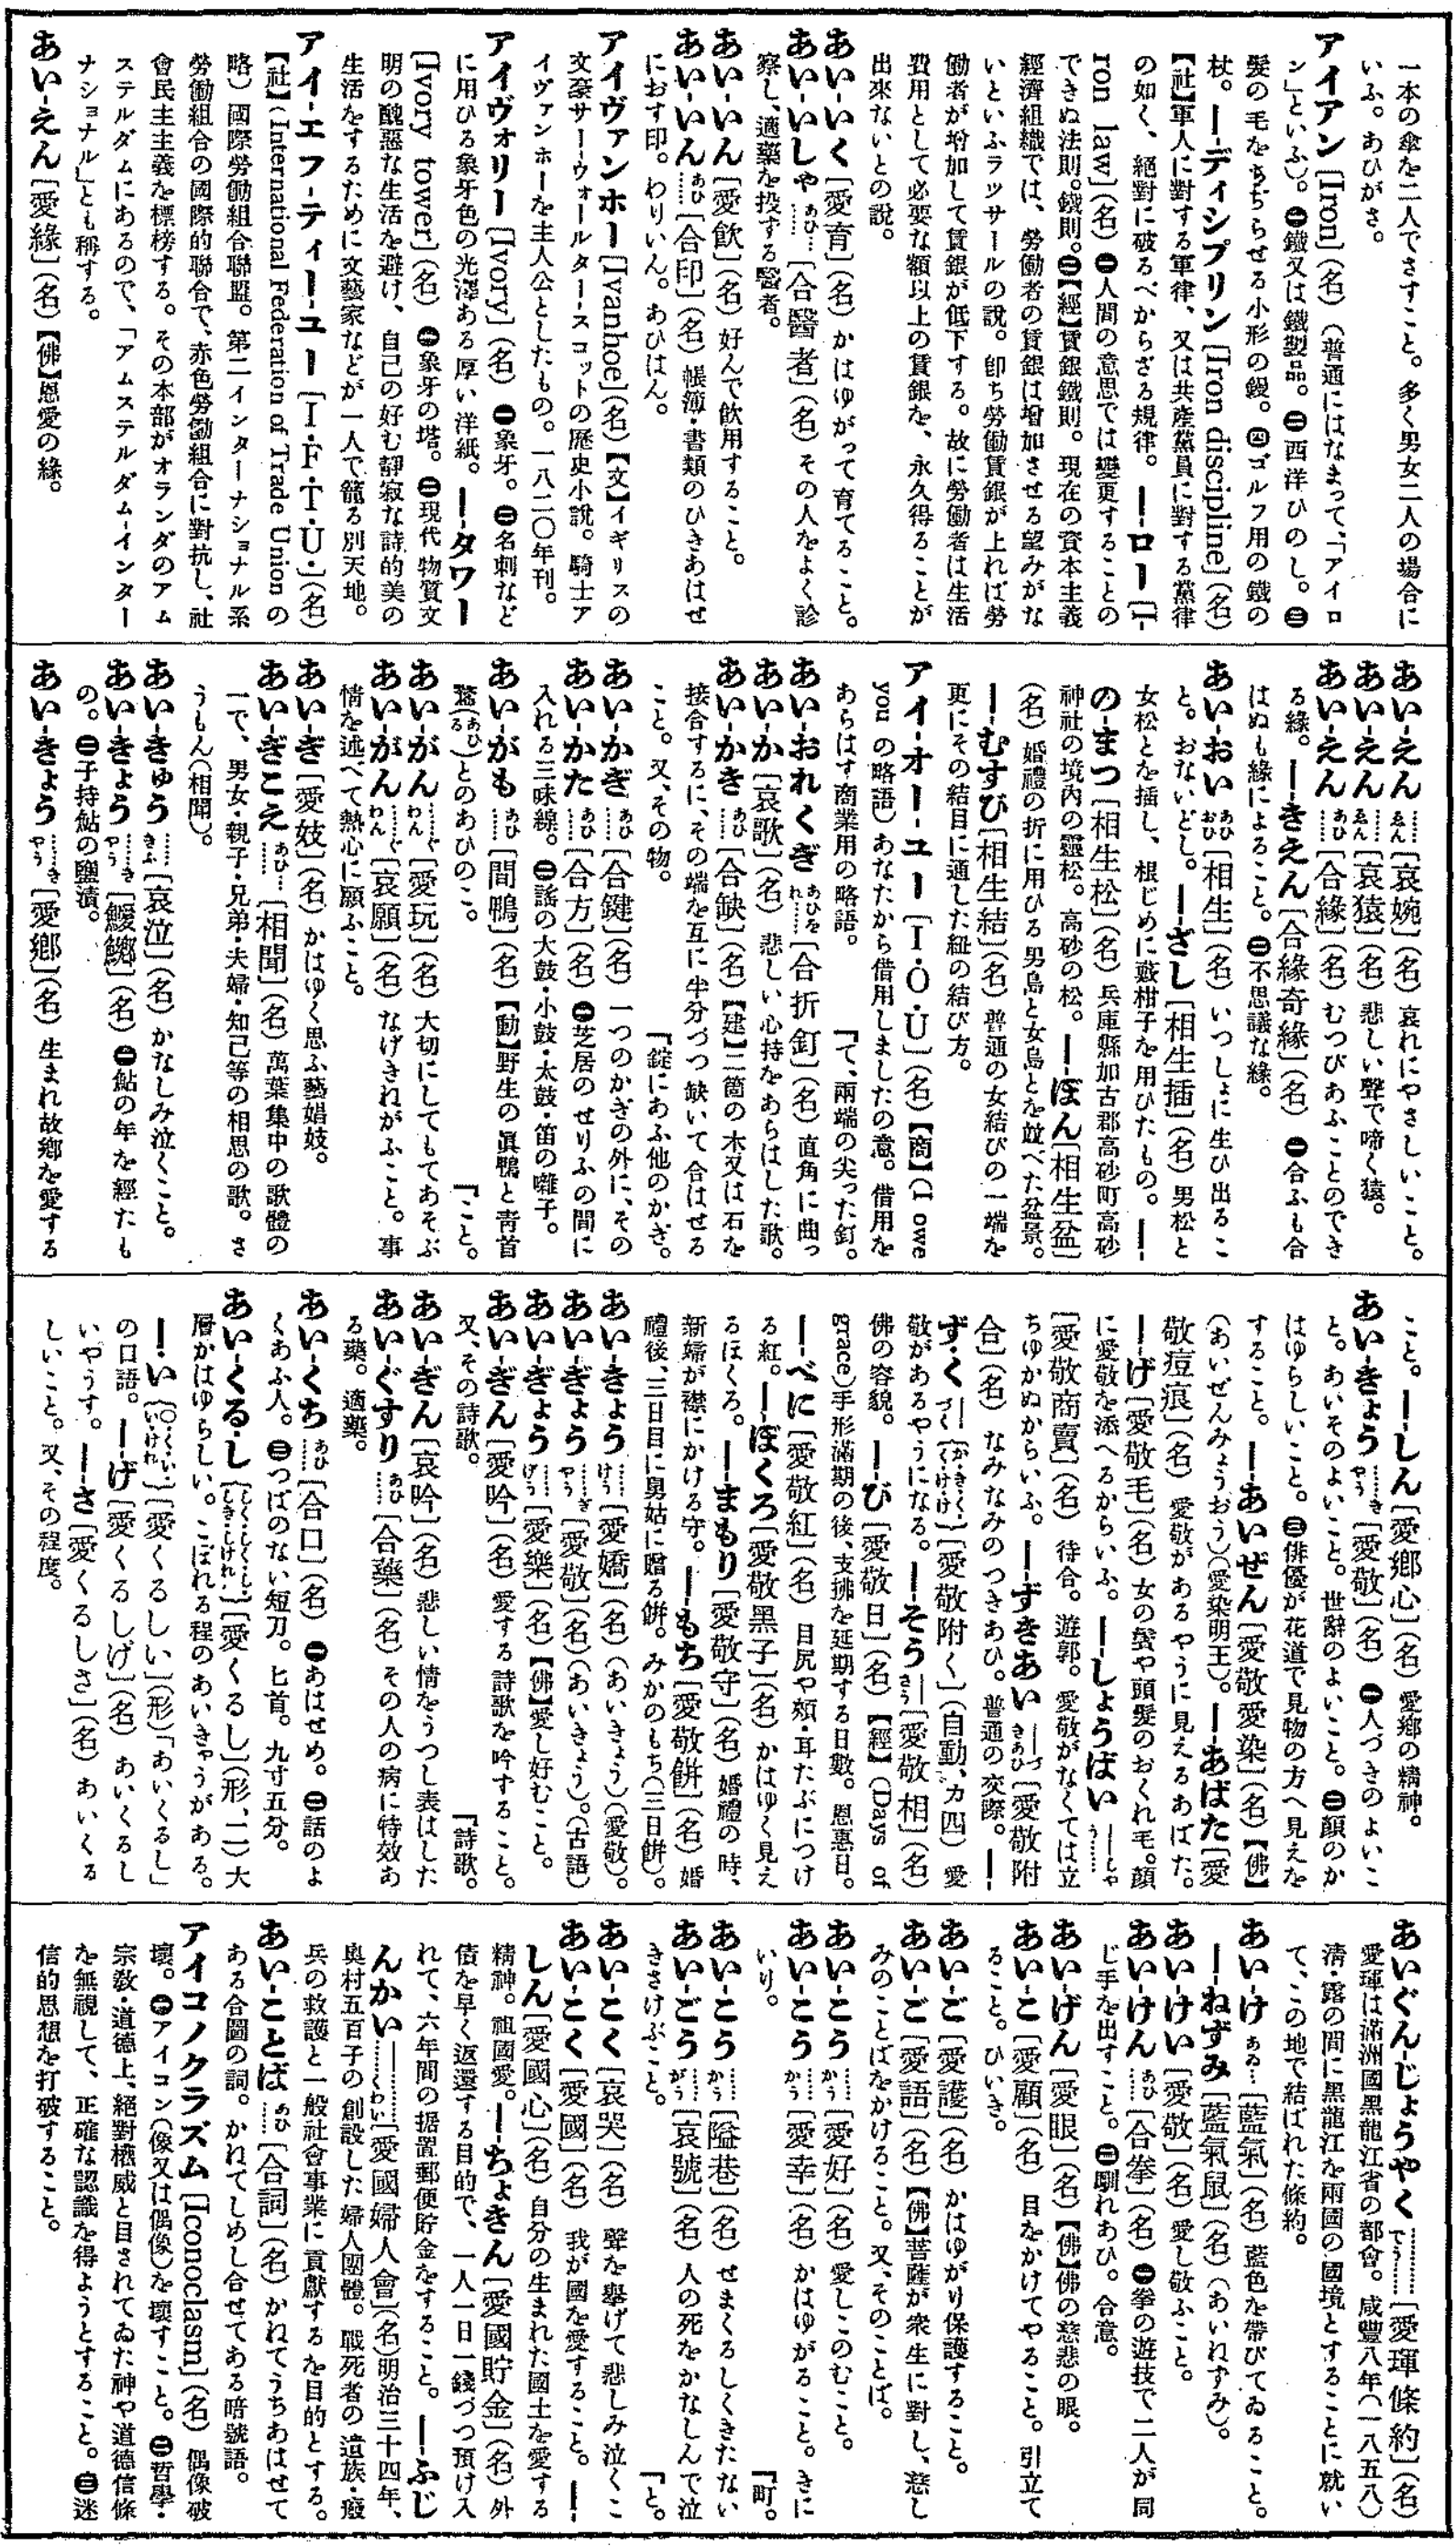

In [21]:
img